In [1]:
import random
import string
import copy
import numpy as np
import random as rd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
size = 8
w = np.array([10, 18, 12, 14, 13, 11, 8, 6])
gain = np.array([5 , 8 , 7 , 6 , 9 , 5 , 4, 3])
capacity = 35

r = np.max(gain / w) 

In [3]:
# gerar pop. 0 ou 1 aleatorios do tamanho da quantidade de itens

def generate_pop(pop_size):
    pop = []
    for being in range(pop_size):
        pop.append(add_random_asterisk(get_random_string()))
    return pop



In [4]:
def penal(proposed):
    level = r * np.maximum((np.sum(proposed*w) - capacity),0)
    return level 

def fitness(proposed):
    s = []
    for prop in proposed:
        s.append(np.sum(gain*prop) - penal(prop))
    return s

def fitness_nq(proposed):
    v = (np.sum(gain*proposed) - penal(proposed))
    return v

In [5]:
def generate_pop(n = 20):
    pop = []
    for i in range (n):
        ind = np.random.randint(0,2,size)
        pop.append(ind)
    return pop


def mutation(offspring, mutation_rate):
    size_ind = len(offspring[0])
    population_copy = copy.copy(offspring)
    for i in range(len(population_copy)):
        if float(random.randint(0, 10))/10 <= mutation_rate:
            loc = random.randint(0,size_ind-1)
            population_copy[i,loc] = int(not (population_copy[i,loc]))
    return population_copy


def crossover(subset_parents, cross_over_rate):
    new_ = []
    if float(rd.randint(0, 10))/10 <= cross_over_rate:
        size_n = len(subset_parents[0])
        for i in range(0,int(len(subset_parents)/2),2):
            cut_v = random.randint(1, size_n-1)
            son1 = np.concatenate((subset_parents[i][0:cut_v], subset_parents[i+1][cut_v:]))
            son2 = np.concatenate((subset_parents[i+1][0:cut_v], subset_parents[i][cut_v:]))
            new_.append(son1)
            new_.append(son2)
    else:
        new_ = subset_parents
        
    return np.array(new_)

def replacement(offspring_new, pop):
    pop = np.concatenate((pop,offspring_new), axis=0)
    evaluate_v = []
    for indv in pop:
        evaluate_v.append(fitness_nq(indv))
    
    sorted_ = sorted(range(len(evaluate_v)), key=evaluate_v.__getitem__)
    pop_order = pop[sorted_]
    pop_order = pop_order[len(offspring_new):]
    
    return pop_order


def selection_fitness_r(population, indv):
    loss = fitness(population)
    loss_total = np.sum(loss) 
    fitness_norm = loss/loss_total # O fitness dos individuos é normalizado em relação ao fitness da população
    selected = []
    for i in range(indv):
        sel = random.random()
        acc = 0
        prev_acc = 0
        chosen = -1
        for j in range(len(fitness_norm)):
            acc += fitness_norm[j]
            if sel < acc and sel >= prev_acc:
                chosen = j
                break
            prev_acc = acc
        selected.append(population[chosen])
    return selected    

In [6]:
pop = generate_pop(40)
cross_over_rate = 0.7
mutation_rate = 0.7
n_inter_max = 500
cut = 2
pop

[array([0, 1, 0, 1, 0, 0, 1, 1]),
 array([0, 1, 1, 0, 0, 0, 1, 0]),
 array([1, 1, 0, 0, 0, 0, 1, 1]),
 array([1, 0, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 0, 0, 1, 1, 1, 0]),
 array([1, 0, 0, 1, 1, 0, 0, 1]),
 array([1, 0, 0, 0, 1, 1, 1, 1]),
 array([0, 0, 1, 1, 1, 1, 1, 1]),
 array([0, 1, 1, 0, 1, 1, 1, 0]),
 array([1, 1, 1, 1, 1, 0, 0, 1]),
 array([0, 1, 1, 1, 0, 1, 1, 0]),
 array([0, 1, 0, 1, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 1, 0, 1, 1]),
 array([1, 0, 0, 0, 1, 1, 0, 0]),
 array([1, 1, 1, 0, 0, 1, 1, 1]),
 array([0, 1, 1, 0, 1, 0, 1, 1]),
 array([0, 0, 1, 1, 1, 0, 1, 0]),
 array([1, 0, 1, 0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0, 1, 1, 0]),
 array([1, 0, 1, 0, 1, 1, 0, 1]),
 array([0, 0, 1, 1, 1, 0, 1, 0]),
 array([1, 0, 1, 1, 1, 1, 1, 1]),
 array([0, 1, 0, 0, 1, 1, 1, 0]),
 array([1, 1, 1, 0, 0, 0, 1, 0]),
 array([0, 1, 0, 1, 1, 1, 0, 0]),
 array([1, 1, 0, 1, 0, 0, 0, 1]),
 array([1, 0, 1, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([0, 1, 

In [7]:
sol = []
n_iter = 0
fitness_avg = []
best_of_generation = []
biggest_fitness = -1
smallest_fitness = 1000

while n_iter < n_inter_max:
    subset_parents = selection_fitness_r(pop, cut)
    offspring = crossover(subset_parents, cross_over_rate)
    offspring_new = mutation(offspring, mutation_rate)
    pop = replacement(offspring_new, pop)
    fitness_scores = []
    last = fitness_nq(pop[-1])
    
    for p in pop:
        v = fitness_nq(p)
        fitness_scores.append(v)
        if last > biggest_fitness:
            biggest_fitness = last
            sol = copy.copy(pop[-1])

    best_of_generation.append(biggest_fitness)
            
    current_fitness_avg = sum(fitness_scores)/len(fitness_scores)
    fitness_avg.append(current_fitness_avg)
    
    if n_iter%30 == 0:
        print (f"Fitness da geração maior valor {n_iter}: {last}\n")    
    n_iter += 1

print (f"Fitness da geração maior valor {n_iter}: {last}\n")    
print(f"Melhor solução encontrada: {sol}")
print(f"Fitness da melhor solução encontrada: {biggest_fitness}")

Fitness da geração maior valor 0: 21.0

Fitness da geração maior valor 30: 21.0

Fitness da geração maior valor 60: 21.0

Fitness da geração maior valor 90: 21.0

Fitness da geração maior valor 120: 21.0

Fitness da geração maior valor 150: 21.0

Fitness da geração maior valor 180: 21.0

Fitness da geração maior valor 210: 21.0

Fitness da geração maior valor 240: 21.0

Fitness da geração maior valor 270: 21.0

Fitness da geração maior valor 300: 21.0

Fitness da geração maior valor 330: 21.0

Fitness da geração maior valor 360: 21.0

Fitness da geração maior valor 390: 21.0

Fitness da geração maior valor 420: 21.0

Fitness da geração maior valor 450: 21.0

Fitness da geração maior valor 480: 21.0

Fitness da geração maior valor 500: 21.0

Melhor solução encontrada: [1 0 1 0 1 0 0 0]
Fitness da melhor solução encontrada: 21.0


In [8]:
print('Solution')
print('Número de interações: {}'.format(n_iter))
print('Os objetos utilizados são: {}'.format(sol))
print('Peso na mochila {}'.format(np.sum(sol*w)))
print('Ganho {}'.format(np.sum(sol*gain)))
for e, i in enumerate(sol):
    if i:
        print('{} - Usa'.format(e+1))
    else:
        print('{} - Não'.format(e+1))

Solution
Número de interações: 500
Os objetos utilizados são: [1 0 1 0 1 0 0 0]
Peso na mochila 35
Ganho 21
1 - Usa
2 - Não
3 - Usa
4 - Não
5 - Usa
6 - Não
7 - Não
8 - Não


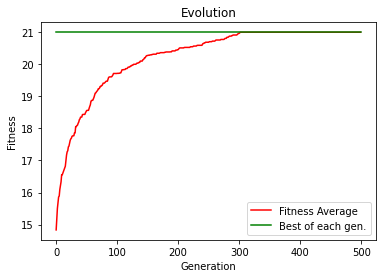

In [9]:
# Plotting both the curves simultaneously
X = range(n_iter)
plt.plot(X, fitness_avg, color='r', label='Fitness Average')
plt.plot(X, best_of_generation, color='g', label='Best of each gen.')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Evolution")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()